# Homotopy between varieties

In the first section we want to visualize a continuous deformation from one variety to another variety. That is,
let $f,g\in\mathbb{Q}[x,y]$ be two polynomials with rational coefficients, we want to visualize $V((1-t)f+tg)$ for
all $t\in[0,1]$. 
        
We use ``Oscar`` to define polynomials and ``Contour`` to find contour lines of the level set with zero level.

[ Info: Saved animation to /home/yueqi_wsl/imgs/homotopy.gif


Plots.AnimatedGif("/home/yueqi_wsl/imgs/homotopy.gif")
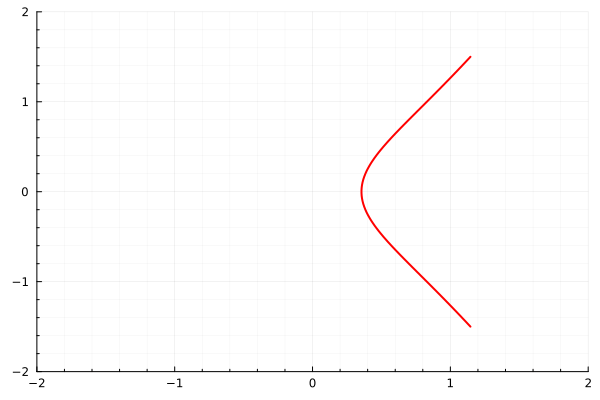

In [5]:
using Oscar
using Plots
using Contour

# define polynomial ring
Qx,(x,y) = PolynomialRing(QQ,["x","y"])

# define two polynomials
f = y^2-x^3-x+2//5
g = 4*x^2+5*y^2-1

# set ranges for xy-coordinates; 
# convert data type from float to rational because evaluate only works for rationals
xs = range(-1.5,1.5,length=100)
ys = range(-1.5,1.5,length=100)
xsRat = Rational.(xs)
ysRat = Rational.(ys)

# make animation
anim = @animate for t in 0//1:1//50:1//1
    zsRat = [Rational(evaluate((1-t)*f+t*g,[xi,yj])) for xi in xsRat, yj in ysRat]
    
    # using contour method to find contour lines. The Lines method returns an iterable object 
    # containing (multiple) line(s). Extract the xy-coordinates of vertices using coordinates method 
    Lines = lines(Contour.contour(xs, ys, zsRat, 0))
    plot(xlim=(-2,2),ylim=(-2,2),legend=false)
    for line in Lines
        X,Y = Contour.coordinates(line)
        plot!(X,Y,minorgrid=true,legend=false,lc=:red,lw=2)
    end
end
gif(anim,"imgs/homotopy.gif",fps=5)

# Deformation of Amoebas

In the second section we want to visualize the deformation of amoebas to their spines, i.e., tropical curves. To do this, let $f\in\mathbb{Q}[x,y]$ be a polynomial with two variables. We plot sets
$$
A_t(f) = \{(\log_t|x|,\log_t|y|)\mid (x,y)\in V(f)\subseteq \mathbb{R}^2\}
$$
for an increasing series of $t$. When the logarithm base $t$ tends to infinity, $A_t(f)$ will converge to the tropical curve defined by $\text{Trop}(f)$ (see [reference here](https://arxiv.org/abs/1502.05950)). Note we can only sample points from $\mathbb{R}$ instead of $\mathbb{C}$ to draw contour lines in $\mathbb{R}^2$. The defect is that we cannot always draw a correct amoeba for any polynomial.

## Sample Density

One problem when drawing amoebas is that we cannot use uniform samples for computation of contour lines and scattering points on amoebas simultaneously. Simply using uniform samples to compute contour lines and then drawing amoebas by taking logarithm results in very dense and very sparse tentacles. To solve this problem we create two grids. We call ``LogGrid`` the grid to plot amoebas and ``ExpGrid`` the grid to compute contour lines. We first use ``ExpGrid`` to compute contour lines. Then we map ``LogGrid`` lines via the exponential map and compute the intersections with contour lines. It enables us to append more points for sparse tentacles to adjust the sample density.   

The Lines method in ``Contour`` returns a list of points $[x_1,x_2,\ldots],[y_1,y_2,\ldots]$ which represents a piecewise linear curve. Each straight line segment starts at $[x_i,y_i]$ and ends at $[x_{i+1},y_{i+1}]$. Thus to compute the intersection of a vertical grid line at $x$ (resp. horizontal line at $y$) it suffices to compute $\lambda\in(0,1)$ for
$$
x = \lambda x_{i}+(1-\lambda)x_{i+1}\quad y = \lambda y_i + (1-\lambda) y_{i+1}  
$$
We encode the intersection procedure into two functions at the beginning.

In [6]:
using Plots
using Contour
using Oscar

function sampleLineSegment(lineSegmentStart,lineSegmentEnd,xValues)
    # compute the intersection of line segments with grid lines
    
    a,b = lineSegmentStart
    c,d = lineSegmentEnd

    sampledX = []
    sampledY = []
    for x in xValues
        t = (x-a)/(c-a)
        if 0<t && t<1 # i.e., xValues lies between a and c
            push!(sampledX,x)
            push!(sampledY,(1-t)*b+t*d)
        end
    end
    return sampledX, sampledY
end

function sampleContourLine(verticesX,verticesY,xValues)
    # increase samples on the contour lines
    
    sampledX = []
    sampledY = []

    for (a,b,c,d) in zip(verticesX,verticesY,
                         verticesX[2:end],verticesY[2:end])
        X,Y = sampleLineSegment((a,b),(c,d),xValues)
        append!(sampledX,X)
        append!(sampledY,Y)
    end
    return sampledX,sampledY
end

sampleContourLine (generic function with 1 method)

In [10]:
# example polynomials

Qx,(x,y) = PolynomialRing(QQ,["x","y"])
f = x*y+x+y-1//2
#f = x + y + 1

x*y + x + y - 1//2

i: 1
i: 2
i: 3
i: 4
i: 5
i: 6
i: 7
i: 8
i: 9
i: 10
i: 11
i: 12
i: 13
i: 14
i: 15
i: 16
i: 17
i: 18
i: 19
i: 20


[ Info: Saved animation to /home/yueqi_wsl/imgs/amoebas.gif


Plots.AnimatedGif("/home/yueqi_wsl/imgs/amoebas.gif")
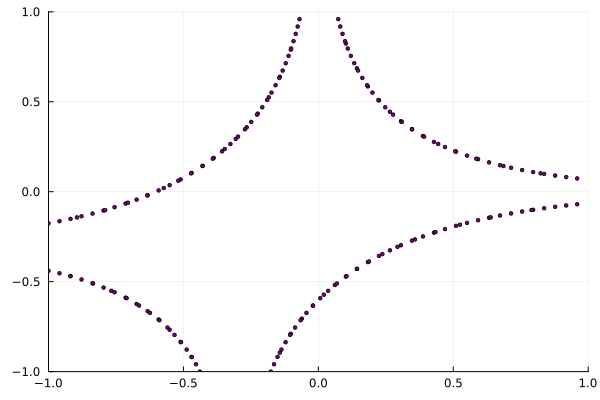

In [13]:
# set LogGrid
b1 = -1
b2 = 1
LogGrid = range(b1,b2,length=50)


anim = @animate for i in 1:20
    println("i: ",i)
    
    # set ExpGrid
    t = 10*i
    Expxs = Rational.(range(-t^b2,t^b2,length=300))
    Expys = Rational.(range(-t^b2,t^b2,length=300))
    
    # compute contour lines
    zs = Rational.([evaluate(f,[xi,yj]) for xi in Expxs, yj in Expys])
    contourLines = lines(Contour.contour(Expxs, Expys, zs, 0))
    plot(xlim=(b1,b2), ylim=(b1,b2), legend=false)

    for line in contourLines
        X,Y = Contour.coordinates(line)
        MapGrids = vcat([ t^gridx for gridx in LogGrid],
                        [-t^gridy for gridy in LogGrid])

        ###
        # sampling along x
        ###
        Xsample,Ysample = sampleContourLine(X,Y,MapGrids)
        logabsX = [ log(t,abs(x)) for x in Xsample ]
        logabsY = [ log(t,abs(y)) for y in Ysample ]
        plot!(logabsX,logabsY,seriestype=:scatter,mc=:purple,ms=2)

        ###
        # sampling along y
        ###
        Ysample,Xsample = sampleContourLine(Y,X,MapGrids)
        logabsX = [ log(t,abs(x)) for x in Xsample ]
        logabsY = [ log(t,abs(y)) for y in Ysample ]
        plot!(logabsX,logabsY,seriestype=:scatter,mc=:purple,ms=2)
    end
end
gif(anim,"imgs/amoebas.gif",fps=5)